In [2]:
import re
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1=pd.read_csv("jaipur_cardekho.csv")
data1[data1['_'].isna()==False].index

Int64Index([  3,   8,  10,  34,  39,  42,  49,  50,  81,  83,  85, 101, 106,
            122, 127, 155, 163, 184, 214, 246, 255, 264, 267, 270],
           dtype='int64')

In [4]:
data1=pd.read_csv("jaipur_cardekho.csv")
index1=data1[data1['_'].isna()==False].index
data1.drop(labels=index1,axis=0,inplace=True)
data1.reset_index(inplace=False)
len(data1)
data1.drop(["Unnamed: 0","_"],axis=1,inplace=True)

In [5]:
data2=pd.read_csv("bangalore_cardekho.csv")
index2=data2[data2['_'].isna()==False].index
data2.drop(labels=index2,axis=0,inplace=True)
data2.reset_index(inplace=False)
len(data2)
data2.drop(["Unnamed: 0","_","_.1","_.2"],axis=1,inplace=True)

In [6]:
data=pd.concat([data1,data2],axis=0)
len(data)

673

In [7]:
data['price']=data.price.str.replace(r'Lakh*',"")
data['price']=data.price.str.replace(r'*',"")
data['price']=data.price.str.replace(r',',"")
data['price']=data.price.astype(float)
for price in data.price:
    if (price>100):
        data.price.replace(price,price/100000,inplace=True)

In [8]:
data['km_driven']=data.km_driven.str.replace(r'kms',"")
data['km_driven']=data.km_driven.str.replace(r',',"")
data['km_driven']=data.km_driven.astype(float)


In [9]:
index=data[data.engine=='Mileage0.0 kmpl'].index
data.drop(labels=index,axis=0,inplace=True)
data['mileage']=data.mileage.str.replace(r'Mileage',"")
data['mileage']=data.mileage.str.replace(r'kmpl',"")
data['mileage']=data.mileage.str.replace(r'km/hr',"")
data['mileage']=data.mileage.str.replace(r'km/kg',"")
data['mileage']=data.mileage.astype(float)

In [10]:
data.drop(labels=data[data.engine=='Wheel SizeN/A'].index,axis=0,inplace=True)
data['engine']=data.engine.str.replace(r'Engine',"")
data['engine']=data.engine.str.replace(r'CC',"")
data['engine']=data.engine.astype(float)

In [11]:
data['power']=data.power.str.replace(r'MaxPower',"")
data['power']=data.power.str.replace(r'Max Power',"")
data['power']=data.power.str.replace(r'null','140')
data['power']=data.power.str.replace(r'bhp',"")
data['power']=data.power.astype(float)

In [12]:
data['torque']=data.torque.str.replace(r'Torque[0-9][0-9][0-9]Nm@',"")

In [13]:

data['wheel_size']=data.wheel_size.str.replace(r'Wheel Size',"")

In [14]:
data['seats']=data.seats.str.replace(r'Seats',"")
data['sold_year']=pd.to_datetime(data.sold_year,format='%Y')


In [15]:
data['year']=data.sold_year.dt.year
data=data.reset_index()
work_data=data.copy()

In [139]:
data.price.describe()

count    669.000000
mean       6.990703
std        5.368840
min        0.600000
25%        3.850000
50%        5.750000
75%        8.250000
max       64.000000
Name: price, dtype: float64

In [68]:
import matplotlib.pyplot as plt

In [111]:
import seaborn as sns

In [148]:
data[(data.price==data.price.max())]

,model,brand,price,sold_year,seller,km_driven,owner_type,fuel,gear,mileage,engine,power,torque,wheel_size,seats
405,2016Ford Mustang V8,Ford,64.0,2016-01-01,Dealer,24000.0,First Owner,Petrol,Automatic,13.0,4951.0,395.0,4250+-50rpm,N/A,4


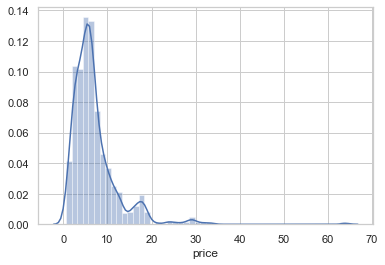

In [147]:
sns.distplot(data.price)

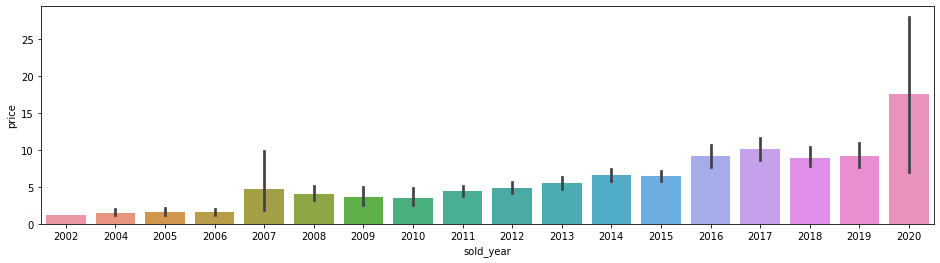

In [120]:
plt.figure(figsize=(16,4))
sns.barplot(data.sold_year.dt.year,data.price)

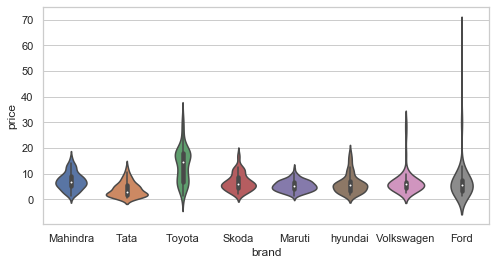

In [162]:
plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
graph=sns.violinplot(data.brand,data.price)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

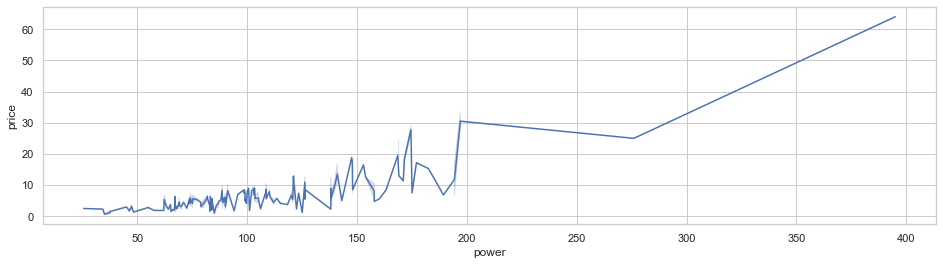

In [167]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
graph=sns.lineplot(data.power,data.price)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

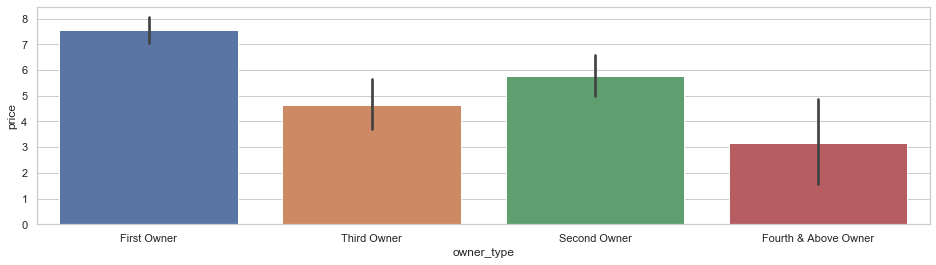

In [170]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
graph=sns.barplot(data.owner_type,data.price)

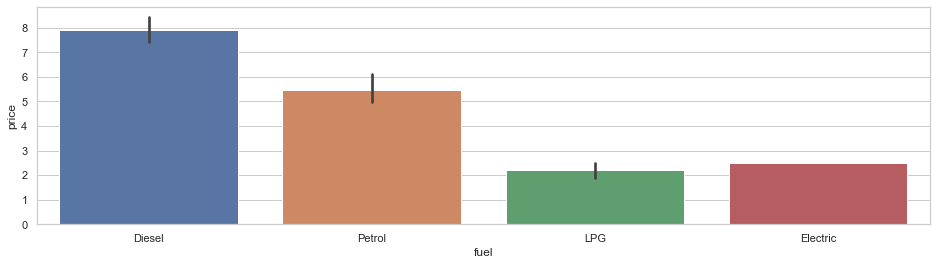

In [175]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
graph=sns.barplot(data.fuel,data.price)

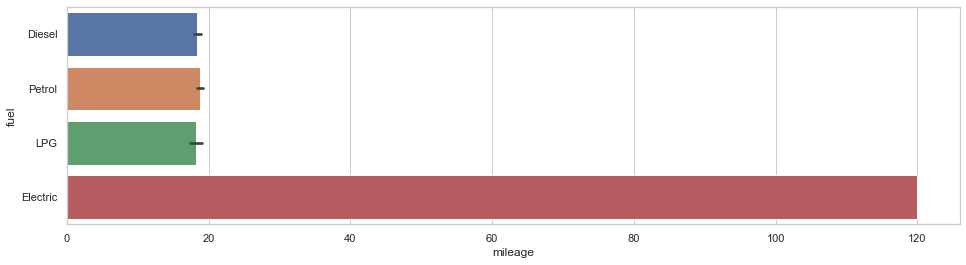

In [177]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
graph=sns.barplot(data.mileage,data.fuel)

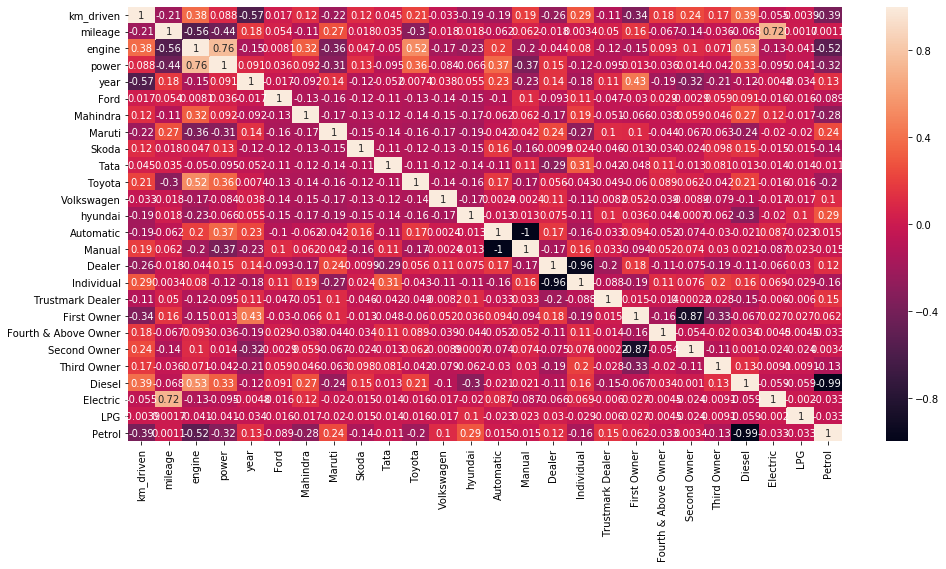

In [890]:
plt.figure(figsize=(16,8))
corr_matrix=X_train.corr()
sns.heatmap(corr_matrix,annot=True)

# model 


In [16]:
data.drop("model",axis=1,inplace=True)
data.drop('seats',axis=1,inplace=True)
data.drop("wheel_size",axis=1,inplace=True)
data.drop('torque',axis=1,inplace=True)
data.drop('index',axis=1,inplace=True)
data.drop('sold_year',axis=1,inplace=True)

In [17]:
work_data=data.copy()

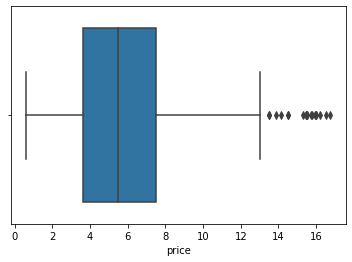

In [779]:
sns.boxplot(data.price)

In [18]:
price_outlier=data[(data['price']>=17) ].index
data.drop(price_outlier,axis=0,inplace=True)

In [19]:
len(data)

628

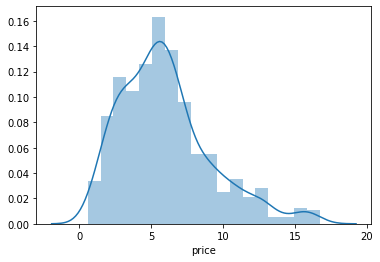

In [20]:
sns.distplot(data.price)

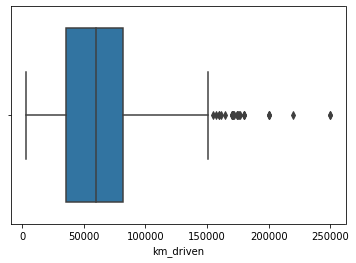

In [21]:
sns.boxplot(data.km_driven)

In [22]:
data.loc[data.km_driven> 150000, 'km_driven'] = 150000

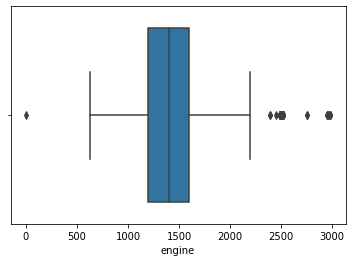

In [23]:
sns.boxplot(data.engine)

In [24]:
data.loc[data.engine> 2200, 'engine'] = 2200
engine_index=data[data.engine< 500].index
data.drop(engine_index,axis=0,inplace=True)


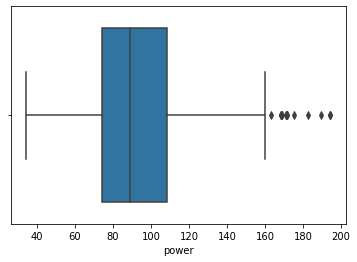

In [25]:
sns.boxplot(data.power)

In [26]:
data.loc[data.power> 160, 'power'] = 160

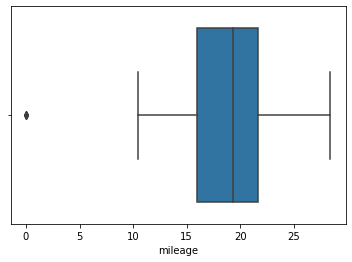

In [27]:
sns.boxplot(data.mileage)

In [28]:
mileage_outlier=data[data.mileage<10].index
data.drop(mileage_outlier,axis=0,inplace=True)

In [29]:
data.describe()

,price,km_driven,mileage,engine,power,year
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,6.026148,63490.036918,19.068475,1492.089888,94.635875,2014.186196
std,3.188701,36381.116865,3.896532,414.133937,27.453774,3.084658
min,0.600000,3117.000000,10.500000,624.000000,34.200000,2004.000000
25%,3.750000,36000.000000,16.000000,1197.000000,74.000000,2012.000000
50%,5.500000,60000.000000,19.300000,1405.000000,88.760000,2015.000000
75%,7.500000,82000.000000,21.680000,1598.000000,108.500000,2017.000000
max,16.750000,150000.000000,28.400000,2200.000000,160.000000,2020.000000


In [30]:
data=pd.concat([data,pd.get_dummies(data['brand'])],axis=1)
data.drop('brand',axis=1,inplace=True)
data=pd.concat([data,pd.get_dummies(data['gear'])],axis=1)
data.drop('gear',axis=1,inplace=True)
data=pd.concat([data,pd.get_dummies(data['seller'])],axis=1)
data.drop('seller',axis=1,inplace=True)
data=pd.concat([data,pd.get_dummies(data['owner_type'])],axis=1)
data.drop('owner_type',axis=1,inplace=True)
data=pd.concat([data,pd.get_dummies(data['fuel'])],axis=1)
data.drop('fuel',axis=1,inplace=True)

In [34]:
target=data['price']
predictor=data.drop('price',axis=1)
predictor.head()

In [36]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
scaler=StandardScaler()

In [145]:
predictor=pd.DataFrame(scaler.fit_transform(predictor),columns=list(predictor.columns))

In [146]:
X_train, X_test, y_train, y_test=train_test_split(predictor,target,random_state=42)

In [168]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.feature_selection import SelectFromModel

In [116]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions= model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    determination=r2_score(y_train,predictions)
    rmse = np.sqrt(mse)
    return rmse,determination

In [117]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    determination=r2_score(y_test,predictions)
    return rmse,determination

In [118]:
def model_metrics(model_name,train_X,test_X,train_y,test_y):
    model=model_name()
    train_model=model.fit(train_X,train_y)
    train_error,r2_train=calc_train_error(train_X,train_y,train_model)
    test_error,r2_test=calc_validation_error(test_X,test_y,train_model)
    return pd.DataFrame(data=(train_error,r2_train,test_error,r2_test,str(model_name),len(model.coef_)),index=['train_error','r2_train','test_error','r2_test','model_name','predictor_no.'])

# model with simple OLS

In [138]:
import statsmodels.api as sm

In [147]:
X_train_OLS = sm.add_constant(X_train)
est = sm.OLS(y_train.values.reshape(-1,1), X_train_OLS).fit()

C:\Users\n\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [148]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     99.15
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          5.27e-150
Time:                        12:38:25   Log-Likelihood:                -804.12
No. Observations:                 467   AIC:                             1650.
Df Residuals:                     446   BIC:                             1737.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0523 

In [182]:
simple_linear=model_metrics(LinearRegression,X_train,X_test,y_train,y_test)

In [183]:
simple_ridge=model_metrics(Ridge,X_train,X_test,y_train,y_test)

# model with  feature selection

Based on the p-value obtained above we seperate the most significant variables 

In [184]:
significant_feat=['Individual','mileage','engine','Petrol','Diesel','Dealer','Manual','Automatic','Toyota','Tata','year','power','km_driven','Trustmark Dealer','First Owner','Third Owner']

In [185]:
X_train_significant=X_train[significant_feat]
X_test_significant=X_test[significant_feat]

In [186]:
linear_p_value=model_metrics(LinearRegression,X_train_significant,X_test_significant,y_train,y_test)

In [187]:
ridge_p_value=model_metrics(Ridge,X_train_significant,X_test_significant,y_train,y_test)

As we can see, we can achieve the same test-error and train-error with just using 16 predictors instead of using 25 predictors.
Also we are able to explain 80% varaibility on test data with these predictors.

# feature selection using select from model

In [188]:
select_model=SelectFromModel(Ridge(alpha=0.005))
select_model.fit(X_train,y_train)
X_train_select_model=X_train[X_train.columns[select_model.get_support()]]
X_test_select_model=X_test[X_test.columns[select_model.get_support()]]
ridge_select_from=model_metrics(LinearRegression,X_train_select_model,X_test_select_model,y_train,y_test)


In [189]:
select_model=SelectFromModel(Lasso(alpha=0.005))
select_model.fit(X_train,y_train)
X_train_select_model=X_train[X_train.columns[select_model.get_support()]]
X_test_select_model=X_test[X_test.columns[select_model.get_support()]]
lasso_select_from=model_metrics(LinearRegression,X_train_select_model,X_test_select_model,y_train,y_test)

In [191]:
pd.concat([simple_linear,simple_ridge,linear_p_value,ridge_p_value,ridge_select_from,lasso_select_from],axis=1)

,0,0,0,0,0,0
train_error,1.35383,1.35384,1.36692,1.36289,1.50057,1.35383
r2_train,0.816389,0.816386,0.812822,0.813924,0.77443,0.816389
test_error,1.48598,1.48526,1.48961,1.48823,1.5036,1.48598
r2_test,0.792814,0.793014,0.791801,0.792186,0.787873,0.792814
model_name,<class 'sklearn.linear_model.base.LinearRegres...,<class 'sklearn.linear_model.ridge.Ridge'>,<class 'sklearn.linear_model.base.LinearRegres...,<class 'sklearn.linear_model.ridge.Ridge'>,<class 'sklearn.linear_model.base.LinearRegres...,<class 'sklearn.linear_model.base.LinearRegres...
predictor_no.,25,25,16,16,6,20


Hence The best model is lasso_select_from model, with 20 features
    r2_test=79.2%
    Train_error=1.35
    test_error=1.48